In [1]:
# TODO: 1. (10 pts) Find the ratios of Carlson monthly sales to the county-wide department stores monthly sales. This is Carlson’s historic market share.
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)

# Set the DataFrame index to a monthly date range from January 2012 to December 2016
start = "2012-01-01"
end = "2016-12-01"
df.index = pd.date_range(start, end, freq='MS')

# Calculate the market share of Carlson's sales compared to the county-wide department stores' sales
df['Market_Share'] = df['Carlson'] / df['County']

# Display the DataFrame with the calculated market shares
print(df[['Month', 'Year', 'Carlson', 'County', 'Market_Share']])

                Month  Year  Carlson  County  Market_Share
2012-01-01    January  2012      NaN     NaN           NaN
2012-02-01   February  2012      NaN     NaN           NaN
2012-03-01      March  2012      NaN     NaN           NaN
2012-04-01      April  2012      NaN     NaN           NaN
2012-05-01        May  2012      NaN     NaN           NaN
2012-06-01       June  2012      NaN     NaN           NaN
2012-07-01       July  2012      NaN     NaN           NaN
2012-08-01     August  2012      NaN     NaN           NaN
2012-09-01  September  2012     1.71    55.8      0.030645
2012-10-01    October  2012     1.90    56.4      0.033688
2012-11-01   November  2012     2.74    71.4      0.038375
2012-12-01   December  2012     4.20   117.6      0.035714
2013-01-01    January  2013     1.45    46.8      0.030983
2013-02-01   February  2013     1.80    48.0      0.037500
2013-03-01      March  2013     2.03    60.0      0.033833
2013-04-01      April  2013     1.99    57.6      0.0345

In [2]:
# TODO: 2. (10 pts) Use pre-hurricane data (2012-Aug 2016) to fit a regression model to predict Carlson’s market share ratios from Sep 2016 to Dec 2016. Report these monthly predictions.

import statsmodels.formula.api as smf

# Prepare data for regression: filter pre-hurricane data
pre_hurricane_data = df[df.index <= "2016-08-01"]

# Fit a regression model using the 'Month' as a categorical variable
model = smf.ols('Market_Share ~ C(Month)', data=pre_hurricane_data).fit()

# Use the model to predict the market share for the months affected by the hurricane (Sep to Dec 2016)
predicted_months = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
    'Year': [2016, 2016, 2016, 2016]
})
predicted_months.index = pd.date_range("2016-09-01", "2016-12-01", freq='MS')

# Add the categorical month to the DataFrame
predicted_months['Market_Share_Prediction'] = model.predict(predicted_months)

# Display the predictions
predicted_months[['Month', 'Year', 'Market_Share_Prediction']]



,Month,Year,Market_Share_Prediction
2016-09-01,September,2016,0.036419
2016-10-01,October,2016,0.040509
2016-11-01,November,2016,0.040327
2016-12-01,December,2016,0.038807


In [3]:
# TODO: 3. (10 pts) Multiply the county monthly sales (Sep 2016 to Dec 2016) times the predicted Carlson’s market share ratios. Report them along with their sum. Carlson can demand this from the insurance company.

# Retrieve county sales for Sep 2016 to Dec 2016
county_sales = df.loc["2016-09-01":"2016-12-01", "County"]

# Calculate the estimated Carlson's sales by multiplying the predicted market share with county sales
predicted_carlson_sales = predicted_months['Market_Share_Prediction'] * county_sales

# Adding this data to the predictions DataFrame for completeness
predicted_months['Predicted_Carlson_Sales'] = predicted_carlson_sales

# Calculate the sum of the estimated sales
total_estimated_sales = predicted_carlson_sales.sum()

# Display the predicted monthly sales and their sum
predicted_months[['Month', 'Year', 'Predicted_Carlson_Sales']], total_estimated_sales


(                Month  Year  Predicted_Carlson_Sales
 2016-09-01  September  2016                 2.512909
 2016-10-01    October  2016                 3.038196
 2016-11-01   November  2016                 3.435843
 2016-12-01   December  2016                 4.726648,
 13.713596068214498)

# TODO: 4. (10 pts) The insurance company rejected this approach. Thus you will use a second approach (next page). For now, explain why was the claim not accepted (one-sentence only)?

The insurance company may have rejected the claim because it relies on statistical predictions rather than actual past sales data, which might not accurately reflect unique post-disaster market conditions.

In [4]:
# TODO: 1. (10 pts) Use pre-hurricane data (2012-Aug 2016) to fit a regression model to predict monthly (Sep 2016-Dec 2016) County-wide sales. Report the model.summary and the model’s R-squared value.

# Fit a regression model to predict monthly county-wide sales using pre-hurricane data (2012-Aug 2016)
county_model = smf.ols('County ~ C(Month)', data=pre_hurricane_data).fit()

# Generate the model summary and the R-squared value
model_summary = county_model.summary()
r_squared = county_model.rsquared

model_summary, r_squared


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 County   R-squared:                       0.963
 Model:                            OLS   Adj. R-squared:                  0.952
 Method:                 Least Squares   F-statistic:                     85.57
 Date:                Sat, 04 May 2024   Prob (F-statistic):           2.13e-22
 Time:                        23:57:28   Log-Likelihood:                -121.35
 No. Observations:                  48   AIC:                             266.7
 Df Residuals:                      36   BIC:                             289.2
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

In [5]:
# TODO: 2. (10 pts) Find ratios of actual vs. predicted monthly County-wide sales (Sep 2016-Dec 2016). Report these excess ratios.
# Predict county-wide sales for Sep 2016 to Dec 2016 using the fitted model
predicted_county_sales = county_model.predict(predicted_months)

# Calculate the excess ratios: actual sales / predicted sales
excess_ratios = county_sales / predicted_county_sales

# Add the excess ratios to the predicted months DataFrame for clarity
predicted_months['Predicted_County_Sales'] = predicted_county_sales
predicted_months['Actual_County_Sales'] = county_sales
predicted_months['Excess_Ratios'] = excess_ratios

# Display the excess ratios
predicted_months[['Month', 'Year', 'Actual_County_Sales', 'Predicted_County_Sales', 'Excess_Ratios']]


,Month,Year,Actual_County_Sales,Predicted_County_Sales,Excess_Ratios
2016-09-01,September,2016,69.0,52.65,1.310541
2016-10-01,October,2016,75.0,54.75,1.369863
2016-11-01,November,2016,85.2,69.00,1.234783
2016-12-01,December,2016,121.8,108.45,1.123098


In [6]:
# TODO: 3. (10 pts) Use pre-hurricane data (2012-Aug 2016) to fit a regression model to predict the loss of regular sales (had there been no hurricane) for Carlson Store from Sep 2016 to Dec 2016. Report these four estimates and the model’s R-squared value.

# Fit a regression model to predict Carlson's regular sales using pre-hurricane data (2012-Aug 2016)
carlson_model = smf.ols('Carlson ~ C(Month)', data=pre_hurricane_data).fit()

# Predict Carlson's regular sales for Sep 2016 to Dec 2016 using the fitted model
predicted_carlson_sales_regular = carlson_model.predict(predicted_months)

# Add the predicted regular sales to the DataFrame for clarity
predicted_months['Predicted_Carlson_Sales_Regular'] = predicted_carlson_sales_regular

# Report the predicted regular sales and the model's R-squared value
predicted_months[['Month', 'Year', 'Predicted_Carlson_Sales_Regular']], carlson_model.rsquared


(                Month  Year  Predicted_Carlson_Sales_Regular
 2016-09-01  September  2016                           1.8975
 2016-10-01    October  2016                           2.2150
 2016-11-01   November  2016                           2.7750
 2016-12-01   December  2016                           4.1875,
 0.8866458150242567)

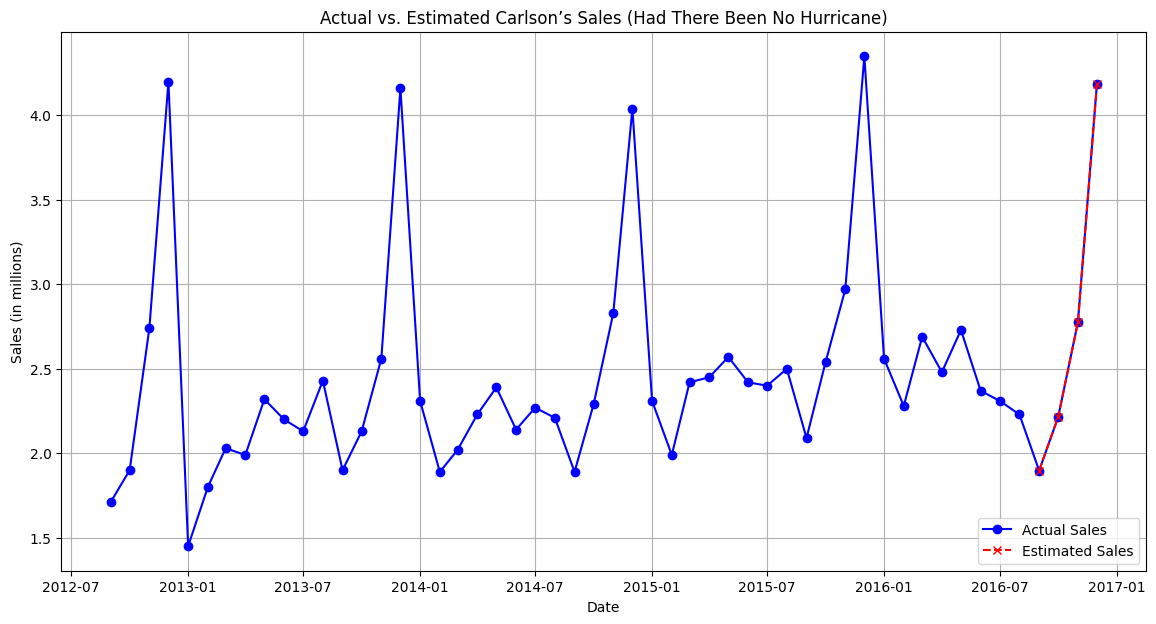

In [8]:
# TODO: 4. (20 pts) To display how well the model fits the data show a line plot of actual and estimated Carlson’s sales had there been no hurricane (on the same chart).

import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for plotting: include both actual sales (up to Aug 2016) and predicted sales (Sep to Dec 2016)
plot_data = pre_hurricane_data[['Carlson']].copy()
predicted_plot_data = predicted_months[['Predicted_Carlson_Sales_Regular']]
predicted_plot_data.index = pd.date_range("2016-09-01", "2016-12-01", freq='MS')
plot_data = pd.concat([plot_data, predicted_plot_data.rename(columns={'Predicted_Carlson_Sales_Regular': 'Carlson'})])

# Plotting the actual and estimated Carlson's sales
plt.figure(figsize=(14, 7))
plt.plot(plot_data.index, plot_data['Carlson'], label='Actual Sales', marker='o', color='blue')
plt.plot(predicted_plot_data.index, predicted_plot_data['Predicted_Carlson_Sales_Regular'], label='Estimated Sales', marker='x', linestyle='--', color='red')
plt.title('Actual vs. Estimated Carlson’s Sales (Had There Been No Hurricane)')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
# TODO: 5. (10 pts) Multiply the excess ratios by Carlson Store predicted sales from Sep 2016 to Dec 2016. Report them along with their sum. Carlson can demand this from the insurance company.

# Calculate the adjusted predicted sales by multiplying the excess ratios with the predicted regular sales
adjusted_predicted_sales = predicted_months['Excess_Ratios'] * predicted_months['Predicted_Carlson_Sales_Regular']

# Add the adjusted predicted sales to the DataFrame for clarity
predicted_months['Adjusted_Predicted_Sales'] = adjusted_predicted_sales

# Calculate the sum of the adjusted predicted sales
total_adjusted_sales = adjusted_predicted_sales.sum()

# Display the adjusted monthly sales and their sum
predicted_months[['Month', 'Year', 'Adjusted_Predicted_Sales']], total_adjusted_sales


(                Month  Year  Adjusted_Predicted_Sales
 2016-09-01  September  2016                  2.486752
 2016-10-01    October  2016                  3.034247
 2016-11-01   November  2016                  3.426522
 2016-12-01   December  2016                  4.702974,
 13.650494171833616)